In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import skimage.io as io
import os
from pycocotools.coco import COCO
import pathlib
import glob

In [13]:
img_dir = "D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\images\\val\\"
all_image_paths = list(glob.glob(img_dir + '*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

In [14]:
len(all_image_paths)

5000

In [15]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [16]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

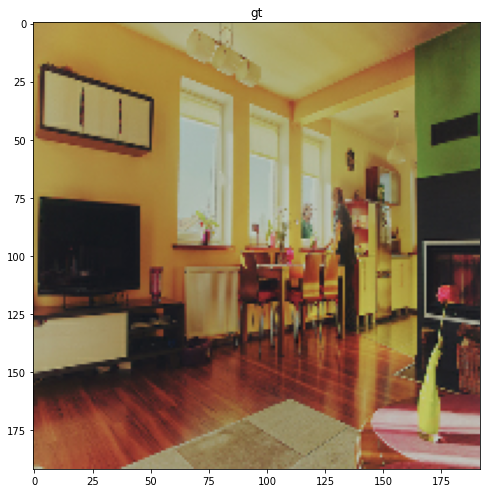

In [19]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
img_path = all_image_paths[0]
plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
# plt.xlabel(caption_image(img_path))
plt.title("gt")
print()

In [20]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [22]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [28]:
import IPython.display as display
data_root = "D:\\Personal\\Sanku_tips\\Object_Detection_COCO\\Object_Detection\\COCOdataset2017\\images\\val\\"
def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0) "

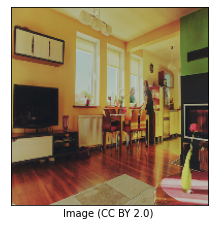

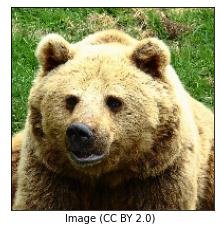

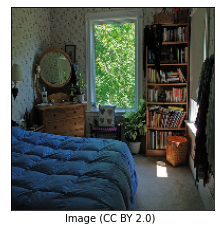

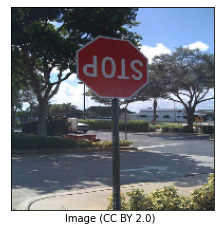

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(caption_image(all_image_paths[n]))
  plt.show()